In [176]:
import numpy as np
import geopandas as gdp
import os
import matplotlib.pyplot as plt
import pandas as pd
import contextily as ctx
#from shapely.ops import cascaded_union
#from geovoronoi.plotting import subplot_from_map
#from geovoronoi import voronoi_regions_from_coords, points_to_coords
from scipy.spatial import Voronoi, voronoi_plot_2d

In [118]:
os.getcwd()

'C:\\Users\\Interventoria\\.jupyter\\Projects\\Voronoi Diagram'

In [119]:
os.listdir()

['.ipynb_checkpoints',
 'MGN_DPTO_POLITICO.cpg',
 'MGN_DPTO_POLITICO.dbf',
 'MGN_DPTO_POLITICO.prj',
 'MGN_DPTO_POLITICO.sbn',
 'MGN_DPTO_POLITICO.sbx',
 'MGN_DPTO_POLITICO.shp',
 'MGN_DPTO_POLITICO.shp.xml',
 'MGN_DPTO_POLITICO.shx',
 'Voronoi colombia.ipynb']

In [120]:
shapefile_data = gpd.read_file('MGN_DPTO_POLITICO.shx')


In [ ]:
# 

<Axes: >

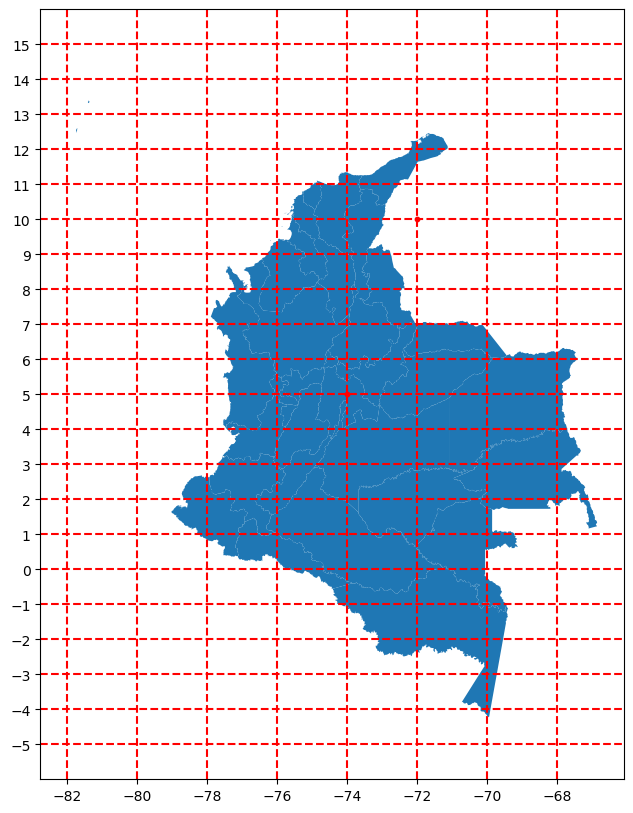

In [130]:
# Dibujar los puntos de las capitales

fig, ax = plt.subplots(figsize=(10, 10))  # Ajusta el ancho y alto según sea necesario

# Dibujar el mapa de Colombia
for y in range(-5, 16, 1):
    ax.axhline(y=y, color='red', linestyle='--')

for x in range(-82, -66, 2):
    ax.axvline(x=x, color='red', linestyle='--')

plt.yticks(range(-5, 16, 1))
plt.xticks(range(-82, -66, 2))




shapefile_data.plot(ax=ax)

dots = gpd.GeoDataFrame(geometry=gpd.points_from_xy([-72,-74], [10,5]))
dots.plot(ax=ax, color='red', marker='o', markersize=10)

In [121]:
Leticia = [-69.94, -4.22]
Medellín = [-75.57, 6.25]
Arauca = [-70.76, 7.08]
Barranquilla = [-74.78, 10.99]
Bogotá = [-74.07, 4.71]
Cartagena = [-75.52, 10.41]
Tunja = [-73.37, 5.54]
Manizales = [-75.51, 5.07]
Florencia = [-75.61, 1.61]
Yopal = [-72.41, 5.34]
Popayán = [-76.61, 2.44]
Valledupar = [-73.26, 10.46]
Quibdó = [-76.64, 5.69]
Montería = [-75.88, 8.75]
Bogotá = [-74.07, 4.71]
Inírida = [-67.92, 3.87]
San_José_del_Guaviare = [-72.64, 2.56]
Neiva = [-75.29, 2.93]
Riohacha = [-72.91, 11.54]
Santa_Marta = [-74.20, 11.24]
Villavicencio = [-73.63, 4.15]
Pasto = [-77.28, 1.21]
Cúcuta = [-72.51, 7.89]
Mocoa = [-76.66, 1.15]
Armenia = [-75.68, 4.54]
Pereira = [-75.69, 4.81]
Bucaramanga = [-73.12, 7.12]
Sincelejo = [-75.38, 9.29]
Ibagué = [-75.23, 4.44]
Cali = [-76.53, 3.45]
Mitú = [-70.24, 1.25]
Puerto_Carreño = [-69.62, 6.19]

In [122]:
capitales = [
    "Leticia",
    "Medellín",
    "Arauca",
    "Barranquilla",
    "Bogotá",
    "Cartagena",
    "Tunja",
    "Manizales",
    "Florencia",
    "Yopal",
    "Popayán",
    "Valledupar",
    "Quibdó",
    "Montería",
    "Bogotá",
    "Inírida",
    "San José del Guaviare",
    "Neiva",
    "Riohacha",
    "Santa Marta",
    "Villavicencio",
    "Pasto",
    "Cúcuta",
    "Mocoa",
    "Armenia",
    "Pereira",
   
    "Bucaramanga",
    "Sincelejo",
    "Ibagué",
    "Cali",
    "Mitú",
    "Puerto Carreño"
]

coordenadas = [
    [-69.94, -4.22],
    [-75.57, 6.25],
    [-70.76, 7.08],
    [-74.78, 10.99],
    [-74.07, 4.71],
    [-75.52, 10.41],
    [-73.37, 5.54],
    [-75.51, 5.07],
    [-75.61, 1.61],
    [-72.41, 5.34],
    [-76.61, 2.44],
    [-73.26, 10.46],
    [-76.64, 5.69],
    [-75.88, 8.75],
    [-74.07, 4.71],
    [-67.92, 3.87],
    [-72.64, 2.56],
    [-75.29, 2.93],
    [-72.91, 11.54],
    [-74.20, 11.24],
    [-73.63, 4.15],
    [-77.28, 1.21],
    [-72.51, 7.89],
    [-76.66, 1.15],
    [-75.68, 4.54],
    [-75.69, 4.81],
 
    [-73.12, 7.12],
    [-75.38, 9.29],
    [-75.23, 4.44],
    [-76.53, 3.45],
    [-70.24, 1.25],
    [-69.62, 6.19]
]

In [123]:
x = [coord[0] for coord in coordenadas]
y = [coord[1] for coord in coordenadas]


In [124]:
data = {
    'Capital': capitales,
    'x': x,
    'y': y
}

df = pd.DataFrame(data)
df.tail(5)

,Capital,x,y
27,Sincelejo,-75.38,9.29
28,Ibagué,-75.23,4.44
29,Cali,-76.53,3.45
30,Mitú,-70.24,1.25
31,Puerto Carreño,-69.62,6.19


In [125]:
points=np.column_stack((df.x,df.y))
points

array([[-69.94,  -4.22],
       [-75.57,   6.25],
       [-70.76,   7.08],
       [-74.78,  10.99],
       [-74.07,   4.71],
       [-75.52,  10.41],
       [-73.37,   5.54],
       [-75.51,   5.07],
       [-75.61,   1.61],
       [-72.41,   5.34],
       [-76.61,   2.44],
       [-73.26,  10.46],
       [-76.64,   5.69],
       [-75.88,   8.75],
       [-74.07,   4.71],
       [-67.92,   3.87],
       [-72.64,   2.56],
       [-75.29,   2.93],
       [-72.91,  11.54],
       [-74.2 ,  11.24],
       [-73.63,   4.15],
       [-77.28,   1.21],
       [-72.51,   7.89],
       [-76.66,   1.15],
       [-75.68,   4.54],
       [-75.69,   4.81],
       [-73.12,   7.12],
       [-75.38,   9.29],
       [-75.23,   4.44],
       [-76.53,   3.45],
       [-70.24,   1.25],
       [-69.62,   6.19]])

C:\Users\Interventoria\anaconda3\lib\site-packages\geopandas\plotting.py:417: UserWarning: The GeoSeries you are attempting to plot is composed of empty geometries. Nothing has been displayed.
  warnings.warn(


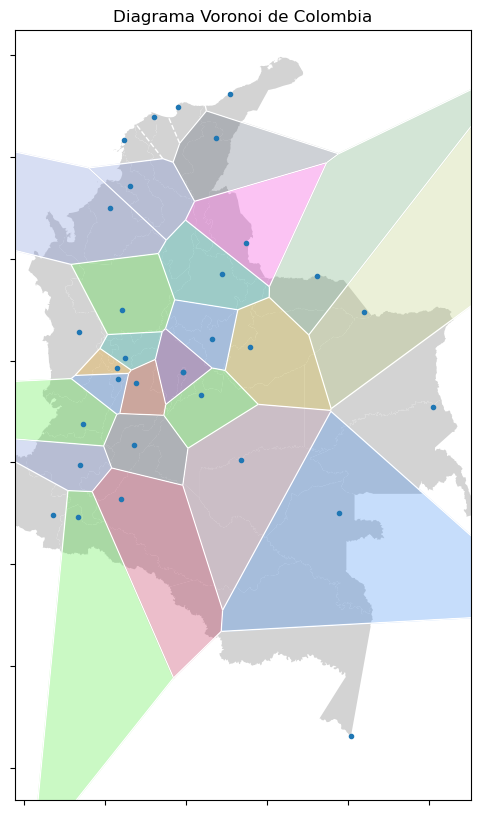

In [216]:
import random
shape=shapefile_data.geometry
# Create a list of random colors with alpha (transparency) for each Voronoi cell
colors = []
for _ in range(len(points)):
    color = '#%06x' % random.randint(0, 0xFFFFFF)
    colors.append(color + '45')  # Adding '45' for alpha value (50% transparency)

# Create the plot
fig, ax = plt.subplots(figsize=(10, 10))

# Extract the boundary geometry from the shapefile data
boundary = gdf.boundary

# Plot the boundary of the map
boundary.plot(ax=ax, color='white')

# Plot the shapefile map
shape.plot(ax=ax, color='lightgray')

# Plot the Voronoi diagram on top of the shapefile map with random colors and transparency
vor = Voronoi(points)
voronoi_plot_2d(vor, ax=ax, show_vertices=False, line_colors='white', line_width=1)

# Assign random colors with transparency to the Voronoi cells
for region in vor.regions:
    if not -1 in region and len(region) > 0:
        polygon = [vor.vertices[i] for i in region]
        plt.fill(*zip(*polygon), color=random.choice(colors))

# Set any additional plot configurations or styling

# Show the plot
ax.set_xticklabels([])
ax.set_yticklabels([])
plt.title('Diagrama Voronoi de Colombia')
plt.savefig('Diagrama Voronoi de Colombia.pdf', dpi=300)
plt.show()